<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Import</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Exploration" data-toc-modified-id="Data-Cleaning-and-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning and Exploration</a></span><ul class="toc-item"><li><span><a href="#Missing-Values-and-Interpoloation" data-toc-modified-id="Missing-Values-and-Interpoloation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing Values and Interpoloation</a></span></li><li><span><a href="#Moving-Average-Smoothing" data-toc-modified-id="Moving-Average-Smoothing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Moving Average Smoothing</a></span></li><li><span><a href="#Exercise:-Compute-the-moving-average-for-the-Dow-dataset-with-a-window-of-24-hours." data-toc-modified-id="Exercise:-Compute-the-moving-average-for-the-Dow-dataset-with-a-window-of-24-hours.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exercise: Compute the moving average for the Dow dataset with a window of 24 hours.</a></span></li><li><span><a href="#Exponential-Smoothing" data-toc-modified-id="Exponential-Smoothing-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exponential Smoothing</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Autocorrelation</a></span></li></ul></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Statistical-test" data-toc-modified-id="Statistical-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statistical test</a></span></li><li><span><a href="#Differencing" data-toc-modified-id="Differencing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#Exercise:-Apply-differencing-to-the-Dow-dataset-and-use-the-Dickey-Fuller-test-to-determine-if-it-is-stationary." data-toc-modified-id="Exercise:-Apply-differencing-to-the-Dow-dataset-and-use-the-Dickey-Fuller-test-to-determine-if-it-is-stationary.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exercise: Apply differencing to the Dow dataset and use the Dickey-Fuller test to determine if it is stationary.</a></span></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model Fitting</a></span></li></ul></li><li><span><a href="#ARIMA-Modeling" data-toc-modified-id="ARIMA-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ARIMA Modeling</a></span><ul class="toc-item"><li><span><a href="#Auto-regressive-Models" data-toc-modified-id="Auto-regressive-Models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Auto-regressive Models</a></span></li><li><span><a href="#ARIMA-Models" data-toc-modified-id="ARIMA-Models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ARIMA Models</a></span><ul class="toc-item"><li><span><a href="#Integration" data-toc-modified-id="Integration-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Integration</a></span></li><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Moving Average</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Further-Reading" data-toc-modified-id="Further-Reading-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further Reading</a></span></li></ul></div>

## Overview

Time series data are commonly encountered in engineering. Data that vary in time can be treated in a simple way by removing the time dependence and treating each point independently. This strategy enables application of standard data science techniques, as we have seen in previous modules. However, in most scenarios data at a given time will depend on the data at a previous time. This means that when we discard the past data we will lose some accuracy. 

If we want to consider prior time points, we will need to engineer new kinds of features that depend on past values. This can be done for a single value as a function of time (univariate time series analysis) or for multiple values as a function of time (multivariate time series analysis). These analyses can become very complex, and we will only cover the basics in this lesson, therefore we will focus only on univariate time series analysis.

In addition to challenges in engineering features for time series, there are a number of other considerations:

* Data cleaining: Missing values can be particularly problematic in time series, since many techniques require data from prior points. This means a single missing value can corrupt many points.

* Statistical properties: correlations in time lead to a different set of statistical approximations since data are no longer independent. Data must be made *stationary* prior to most statistical analyses.

* Validation: it is critical that test/train splits account for time so that the training set does not contain any information from the future. This sounds simple, but it is often tedious in practice.

In general, time series analysis consists of breaking a time series into various parts:

* Trend: Data increases or decreases with time. This could be linear or non-linear (e.g. exponential)
* Seasonality: Regular oscillations in time, typically following some multiple of days/weeks/months. The frequency of seasonal patters are always fixed.
* Cyclicity: Irregular oscillations in time, typically following an unpredictable pattern (e.g. economic conditions) with a relatively long timescale.
* Noise: Short-term variations arising to underlying stochatic processes. This is often "white noise" or normally-distributed error, but could also follow other statistical distributions.

A time series can combine these terms additively:

$x_t = T_t + S_t + C_t + \epsilon_t$

where $x_t$ is the data at time $t$, and $T$, $S$, $C$, and $\epsilon$ represent the trend, seasonality, cyclicity, and noise respectively. Alternatively, a time series can combine terms multiplicatively:

$x_t = T_t \times S_t \times C_t \times \epsilon_t$

The goals of time series analysis are typically to understand these patterns in past data, and use this knowledge to forecast future data. However, predicting the future is always hard, so time series analysis can be very challenging!

### Data Import

In this lecture we will work with a new Python package called `statsmodels`, along with a new dataset of CO$_2$ concentrations as well as the familiar Dow dataset. First, let's import the standard packages:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

Next we can import the Dow dataset. This time we are going to do something slightly different, since we will only look at the impurity as a function of time. We actually have to do less cleaning in this case, since all the time points already have a value for impurity level.

In [3]:
df = pd.read_excel('data/impurity_dataset-training.xlsx')
dow_df = df[['Date', 'y:Impurity']]
dow_df.loc[:,'Date'] = pd.to_datetime(dow_df['Date'])
dow_df = dow_df.set_index('Date')

Remember that by converting the index to a `DateTime` datatype we can do some fancy indexing by dates. This becomes very useful for time series, and most of the methods we use will work best if a dataframe with a `DateTime` index is used as input.

In [4]:
dow_df['01/01/2016 05:00:00':'01/01/2016 12:00:00']

,y:Impurity
Date,
2016-01-01 05:00:00,1.80693
2016-01-01 06:00:00,1.83343
2016-01-01 07:00:00,1.86816
2016-01-01 08:00:00,1.90000
2016-01-01 09:00:00,1.90000
2016-01-01 10:00:00,1.90000
2016-01-01 11:00:00,1.90000
2016-01-01 12:00:00,1.90000


We can also easily plot this using the built-in `plot` method:

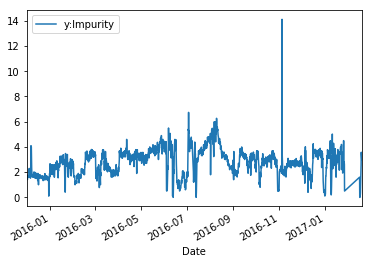

In [5]:
dow_df.plot()

Next, we need to install a new package called `statsmodels`. This works best with `conda`, but should also work with `pip` on many computers:

In [ ]:
#! conda install statsmodels

The CO$_2$ concentration data is actually available inside the `statsmodels` package. Note that the block below may give some errors if there are conflicts between `statsmodels` and other packages. This can usually be resolved by updating everything, or by searching for the error you get on StackOverflow.

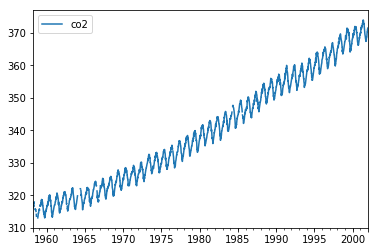

In [6]:
import statsmodels.api as api

sm_data = api.datasets.co2.load_pandas()
co2_df = sm_data.data
co2_df.plot()

If everything worked you should see the CO$_2$ concentration in ppm as a function of time from 1958 - 2002, as measured at the Mauna Loa observatory. Unsurprisingly the concentration is generally increasing, although we can also see some clear seasonal variations.

## Data Cleaning and Exploration

### Missing Values and Interpoloation

We can see that in the CO$_2$ dataset there are a few missing values, perhaps due to equipment malfunctions or interference from volcanic eruptions. This is very common in time series, and there are a few simple strategies for solving this:

* forward fill: use the prior value
* backward fill: use the subsequent value
* linear interpolation: average the prior and subsequent values
* non-linear interpolation: fit non-linear functions like splines using multiple prior/subsequent values

Luckily `pandas` has some useful functions to make this easy. The `fillna` method handles forward/backward fills, and the `interpolate` method handles basic interpolation. Let's see how these compare:

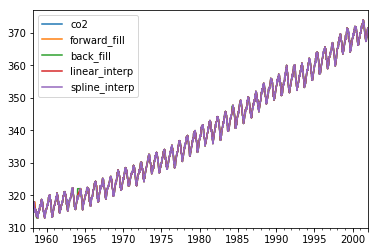

In [7]:
interp_df = co2_df
interp_df['forward_fill'] = interp_df['co2'].fillna(method='ffill')
interp_df['back_fill'] = interp_df['co2'].fillna(method='bfill')
interp_df['linear_interp'] = interp_df['co2'].interpolate(method='linear')
interp_df['spline_interp'] = interp_df['co2'].interpolate(method='spline', order=3)

interp_df.plot()

Note that we are taking advantage of the built-in plotting features of `pandas` here by placing each different option in a new column. However, we can't really see the regions where data was missing because it is zoomed out too far. Let's zoom in on a particular year with missing data:

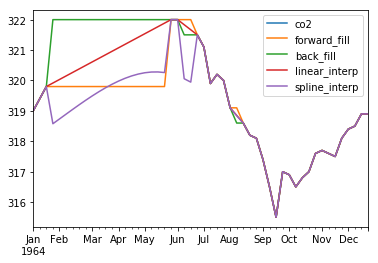

In [8]:
interp_df["01/01/1964":"01/01/1965"].plot()

Of these, the linear interpolation seems to be the most reasonable. It is sufficiently simple that we aren't risking corrupting the data by introducing new patterns, but still looks a bit more realistic than the forward/backfills. We will select linear interpolation and use the interpolated dataset moving forward. If your data is missing large chunks instead of just a few points then it may need to be discarded, or a more sophisticated interpolation method may be needed.

In [9]:
co2_df = interp_df[['co2','linear_interp']]
co2_df = co2_df.rename(columns={'linear_interp':'co2_interp'})
co2_df.head(3)

,co2,co2_interp
1958-03-29,316.1,316.1
1958-04-05,317.3,317.3
1958-04-12,317.6,317.6


Here we have also kept the raw data in case we need to compare the two at any point.

### Moving Average Smoothing

Now that we have removed missing values we can start exploring the data. One common technique is to check how the average changes as a function of time. However, this requires that we determine a **window** over which to take the average:

$MA_t = \frac{1}{M}\sum_{j=1}^M x_{t-j}$

where $MA_t$ is the moving average at time $t$, $x_t$ is the observation at time $t$, and $M$ is the size of the window.

In the case of the CO$_2$ data the sampling frequency is weekly, so we need to determine how many weeks we will average over at each point.

Moving averages and statistics are common in time series analysis, and `pandas` has a "rolling" dataframe concept that makes this much easier to do. Let's see how it works:

In [18]:
window = 10

rolling_df = co2_df['co2_interp'].rolling(window)

rolling_df

Rolling [window=10,center=False,axis=0]

This isn't a very helpful explanation, but we can take the mean of this dataframe to compute a moving average:

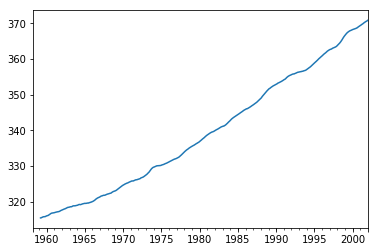

In [17]:
moving_avg = rolling_df.mean()
moving_avg.plot()

At first glance this doesn't look particularly different. Let's check how it changes as we increase the size of the window:

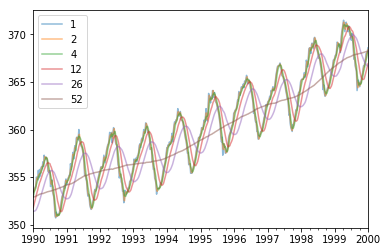

In [20]:
fig, ax = plt.subplots()

for window in [1,2, 4, 12, 26, 52]:
    rolling_df = co2_df['co2_interp'].rolling(window)
    moving_avg = rolling_df.mean()
    moving_avg['01/01/1990':'01/01/2000'].plot(ax=ax, alpha=0.5, label=str(window))
ax.legend()

Here we have zoomed in to 1990-2000 to see things more clearly. As the window increases the seasonal patterns become less pronounced. If we average over a year (52 weeks) the seasonal patterns disappear completely and only the increasing trend is observed. We can also use the rolling dataframe to check other statistics over time:

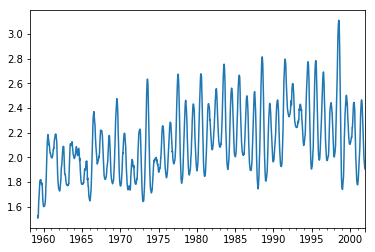

In [25]:
rolling_df = co2_df['co2_interp'].rolling(52)
moving_stdev = rolling_df.std()
moving_stdev.plot()

We see that there are also seasonal patterns in the standard deviation, although they are less pronounced.

### Exercise: Compute the moving average for the Dow dataset with a window of 24 hours.

### Exponential Smoothing

Moving averages effectively smooth the data by averaging over time. An alternative approach is to use "exponential smoothing":

$y_t = \alpha x_t + (1-\alpha) y_{t-1}$

where $y_t$ is the smoothed result. This is also sometimes called an "exponential weighted moving average". The idea is that the influence of prior points decays exponentially, and the parameter $\alpha$ varies from 0 to 1 and controls the speed of the decay. As $\alpha$ approaches 0 the data will be smoothed more, while as $\alpha$ approaches 1 the data will be smoothed less.

Let's see how it works:

In [26]:
def exp_smoothing(x, alpha):

    y = [x[0]] #start with x
    for t in range(1, len(x)):
        y.append(alpha * x[t] + (1 - alpha) * y[t-1])
        
    return y

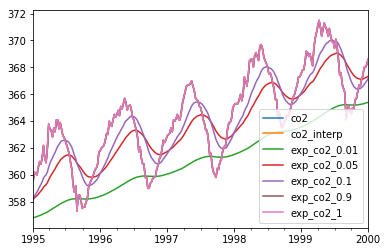

In [28]:
exp_df = co2_df.copy()

ax.plot(co2_df.index, co2_df['co2_interp'])
for alpha in [0.01, 0.05, 0.1, 0.9, 1]:
    smoothed = exp_smoothing(co2_df['co2_interp'], alpha)
    exp_df['exp_co2_'+str(alpha)] = smoothed

exp_df['01/01/1995':'01/01/2000'].plot()

The results are similar to a moving average, but vary slightly. There are also variants such as "double" and "triple" exponential smoothing. Exponential smoothing is preferred when there is no clear pattern or window size that makes sense.

### Autocorrelation

The concept of autocorrelation is critical in time series analysis, and captures the fact that data will be correlated with itself at different times. To see how this works let's try to predict the future CO$_2$ concentration using a linear regression model with the $CO_2$ concentration from a past point. We will use a **lag**, which is similar to a window, to do this. The lag determines how far back we are looking to grab the input to the regression model. First, we will create an $x$ and $y$ dataset where $x$ is determined by the past (lagged) values and $y$ is the current/future value that we are trying to predict:

In [35]:
from numpy import polyfit
from scipy.stats import pearsonr

lag = 20
dataset = co2_df['co2_interp']

xs = []
ys = []
for i in range(len(dataset)):
    if i >= lag:
        x_i = dataset[i]
        x_lag = dataset[i-lag]
        xs.append(x_lag)
        ys.append(x_i)

Next, we can fit a simple linear regression model and compute the $r^2$:

In [36]:
m, b = np.polyfit(xs, ys, deg=1)
xs = np.array(xs)
ys = np.array(ys)

SST = sum((ys - np.mean(ys))**2)
SSE = sum((ys - (m*xs +b))**2)
r2 = (SST - SSE)/SST
print(np.sqrt(r2))
print(np.std(ys - m*xs -b))

0.9748485264756322
3.7968926900406204


We see that $r^2$ is extremely high! The standard deviation of the error is also relatively low ($<1 ppm$). Let's plot the data:

Slope: 0.9799451704565871, Intercept: 7.270519493339328


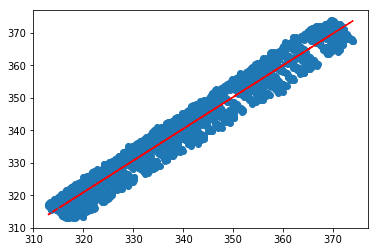

In [37]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
ax.plot(xs, m*xs+b, '--r')
print("Slope: {}, Intercept: {}".format(m, b))

We see that these values are highly correlated! The slope is also nearly 1. Essentially this tells us that we can accurately predict the CO$_2$ concentration at a given time by adding an offset (given by the intercept) to the CO$_2$ concentration at a past time. This is the idea behind "autocorrelation": the data is correlated with itself at various lag times. Let's compute the autocorrelation using the `statsmodels` package:

In [38]:
from statsmodels.tsa.stattools import acf

autocorr = acf(dataset, nlags=40)
print(len(autocorr))
print(autocorr)

41
[1.         0.99841729 0.99680976 0.99507762 0.99309751 0.99091443
 0.98856723 0.98613468 0.98361335 0.98102909 0.97838067 0.97570859
 0.97305965 0.97041407 0.96783846 0.96531391 0.96285852 0.96049149
 0.95821555 0.95605587 0.9539981  0.95206024 0.95022237 0.94847393
 0.94682025 0.94527213 0.9438388  0.94251583 0.94130638 0.94024082
 0.93928811 0.93844081 0.93771937 0.93713653 0.93667928 0.93637402
 0.93625058 0.93621867 0.93631148 0.9364876  0.93675089]


/Users/Lecturing/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


This tells us how correlated the data is with itself at various lags. We can also use the plotting function to check this visually. Note the `_ = ` syntax is just used to avoid displaying the same plot twice (a small issue with how `statsmodels` works in Jupyter notebooks).:

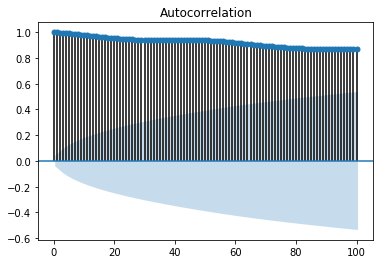

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_ = plot_acf(dataset, lags=100)

The autocorrelation is very high, even out past 100 weeks. The shaded cone here shows the confidence intervals for data that is not actually correlated. If the autocorrelation is outside the cone then it is statistically significant.

There is also a related concept called "partial autocorrelation". This shows only the linearly-independent correlation between a given lag and the point. We can think of it as the regression coefficient from the form:

$x_t = \sum_{i=1}^{M} w_i x_{t-i}$

where $M$ is the lag. The partial autocorrelation is given by $w_i$. We can also plot this:

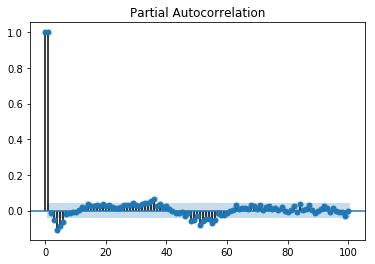

In [42]:
_ = plot_pacf(dataset, lags=100)

We see that this falls off much faster, implying that there is a strong correlation between the prior point and the current point, and that all the other correlations in the autocorrelation arise because the prior point and the one prior to that are also correlated. We can also see that some seasonal trends are visible. Let's see how this looks for the Dow dataset:

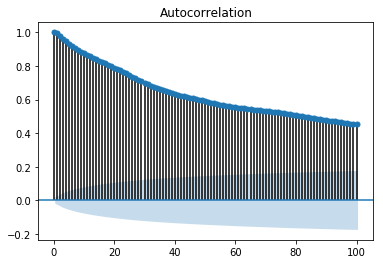

In [43]:
_ = plot_acf(dow_df, lags=100)

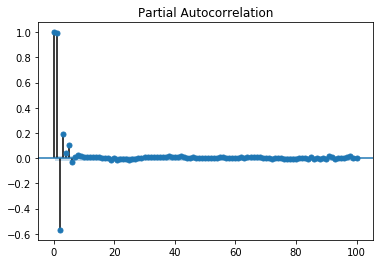

In [44]:
_ = plot_pacf(dow_df, lags=100)

We see that the Dow dataset is also strongly autocorrelated past 100 prior points, although the autocorrelation decays more rapidly than in the CO$_2$ dataset. The partial autocorrelation falls off a bit slower, with up to 6 prior points having significant partial autocorrelations, although no long-term seasonal variations are visisble. We will revisit these concepts later when selecting predictive models.

## Stationarity

One of the most important concepts in time series analysis is "stationarity". A stationary dataset has the following properties:

* mean does not vary in time
* variance does not vary in time
* autocorrelation does not vary in time

Intuitively, if a time series is "stationary" it means that the statistical properties of the data do not vary in time. Most time series are not stationary to start with. Some common trends that occur in time series are:

* Linear trend: values increase or decrease linearly in time
* Seasonal trend: values oscillate in time, typically over different seasons
* Exponential trend: values increase exponentially in time

There can also be trends that are more difficult to identify, such as variations in the standard deviation over time. The process of creating a stationary dataset is sometimes called de-trending.

Stationarity seems like a simple concept, but in practice it can be difficult to determine whether or not a dataset is stationary in a rigorous statistical sense.

### Statistical test

Fortunately, statisticians have developed a test for determining if a dataset is stationary. More precisely, in typical statistical fashion, they have developed a test that tells you if a dataset is *not* stationary. The Dickey-Fuller test evaluates the null hypothesis that a dataset is not stationary. If the resulting $p$-value is high, then the dataset is *not* stationary. Technically we will use the augmented Dickey-Fuller test here, but fortunately it is implemented in `statsmodels` so we don't have to worry about the detail.

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
p_val = adfuller(co2_df['co2_interp'])[1]
print("Probability the data is stationary: {}".format(1-p_val))

Probability the data is stationary: 0.03876154717138891


Note that the `adfuller` function also returns some additional details, as described in the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller), but we will only use the $p$-value which is the second item returend (indexed by 1).

Let's take a look at some of the statistics over a window as a function of time:

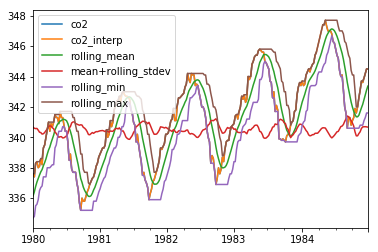

In [48]:
window = 10

rolling_df = co2_df['co2_interp'].rolling(window)

stats_df = co2_df.copy()
stats_df['rolling_mean'] = rolling_df.mean()
stats_df['mean+rolling_stdev'] = stats_df['co2_interp'].mean() + rolling_df.std()
stats_df['rolling_min'] = rolling_df.min()
stats_df['rolling_max'] = rolling_df.max()

stats_df["01/01/1980":"01/01/1985"].plot()

Clearly, the mean, min, and max are varying over time, so it isn't surprising that the test tells us this is very unlikely to be stationary.

### Differencing

Differencing is one of the most common and simplest ways to make a dataset more stationary. The idea is simple: just look at the difference between a point and the prior point. We can do this very easily using the `shift` method of `pandas`, which simply shifts the entire dataframe.

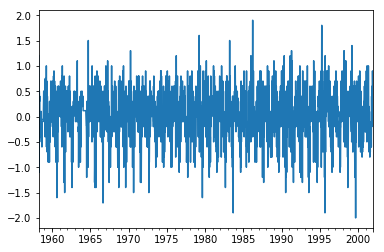

In [49]:
co2_df['co2_diff'] = co2_df['co2_interp'] - co2_df['co2_interp'].shift(1)
co2_df['co2_diff'].plot()

We see that there are no obvious patterns now. We can also check the statistics as a function of time:

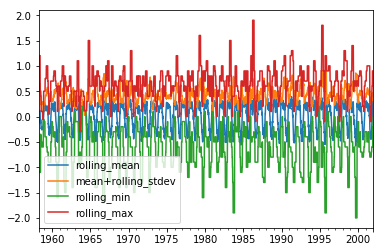

In [50]:
window = 10

rolling_df = co2_df['co2_diff'].rolling(window)

stats_df = co2_df.copy()
stats_df['rolling_mean'] = rolling_df.mean()
stats_df['mean+rolling_stdev'] = stats_df['co2_diff'].mean() + rolling_df.std()
stats_df['rolling_min'] = rolling_df.min()
stats_df['rolling_max'] = rolling_df.max()

stats_df[['rolling_mean', 'mean+rolling_stdev', 'rolling_min', 'rolling_max']].plot()

We can see that there are some oscillating patterns. Let's check the Dickey-Fuller test:

In [51]:
p_val = adfuller(co2_df['co2_diff'][1:])[1]
print("Probability the data is stationary: {}".format(1-p_val))

Probability the data is stationary: 1.0


The data is now stationary from a statistical perspective. We can also check the autocorrelation:

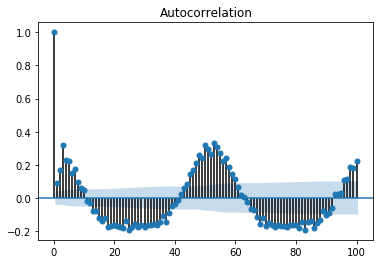

In [52]:
_ = plot_acf(co2_df['co2_diff'][1:], lags=100)

The autocorrelation has decreased, and the seasonal patterns are clearly visible. Despite the fact that the data is stationary there are a lot of statistically-significant auto-correlation. We can also check the partial autocorrelation:

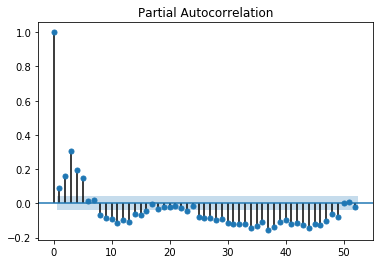

In [58]:
_ = plot_pacf(co2_df['co2_diff'][1:], lags=52)

The partial autocorrelation is now more similar to the full autocorrelation, with some seasonal patterns still visible but somewhat less clear.

### Exercise: Apply differencing to the Dow dataset and use the Dickey-Fuller test to determine if it is stationary.

### Model Fitting

An alternate approach is to fit a model to remove trends and/or seasonality in the data. This only really works if there are clear trends or seasonal patterns, but in the case of the CO$_2$ dataset we can see a clear increasing trend with some seasonal variations. Let's start by fitting the linear trend:

Text(0.5,0,'Weeks')

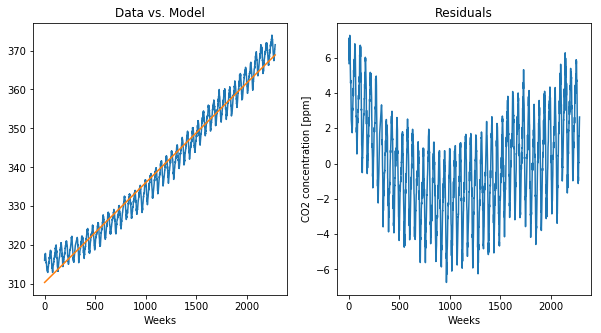

In [59]:
y = co2_df['co2_interp']
weeks = np.arange(0, len(y))
m, b = np.polyfit(weeks, y, deg = 1)
yhat_linear = m*weeks + b
resid = y-yhat_linear

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(weeks, y)
axes[0].plot(weeks, m*weeks + b)
axes[1].plot(weeks, resid)
axes[0].set_title('Data vs. Model')
axes[0].set_xlabel('Weeks')
axes[1].set_ylabel('CO2 concentration [ppm]')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Weeks')

There is a clear seasonal trend in the residuals, as well as a quadratic pattern. We can model seasonal variations with a sine curve, which has the form:

$A sin(\omega t + \phi)$

where $A$ is the amplitude, $\omega$ is the frequency, and $\phi$ is the offset. Note that $\omega$ and $\phi$ are in radians, so we need to transform them to weeks. Let's set up a sine wave with a period of 26 weeks and an offset of 5 weeks.

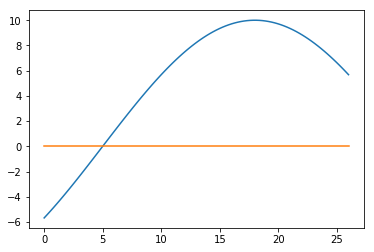

In [62]:
fig, ax = plt.subplots()

t = np.linspace(0,26, 100)

y_sine = 10*np.sin((np.pi/26.)*t - (5/26.)*np.pi)

ax.plot(t,y_sine)
ax.plot(t, t*0)

There are lots of ways to fit this, but we will use some techniques from prior lectures here. We are going to create some sine wave features with varying frequencies and offsets. We expect that the frequency will be about every 6 months, or 26 weeks. The function below will generate a range of sine waves with varying frequencies and offsets:

(0, 52)

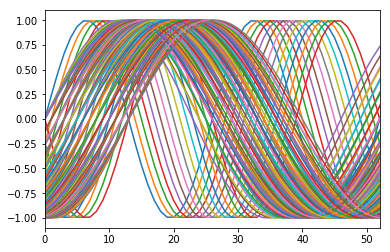

In [63]:
sine_frequencies = [13, 23,24,25, 26, 26.5, 27]#, 27,28,29]
sine_offsets = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

def make_sine_features(x, sine_frequencies, sine_offsets):
    all_feats = [x]
    names = ['x']
    all_feats.append(x**2)
    names.append('x^2')
    for freq in sine_frequencies:
        for offset in sine_offsets:
            new_feat = np.sin((np.pi/freq)*x - (offset/freq)*np.pi)
            all_feats.append(new_feat)
            names.append('sin((pi*x)/{} + {})'.format(freq, offset))
    all_feats = np.array(all_feats).T
    return all_feats, names

X, names = make_sine_features(weeks, sine_frequencies, sine_offsets)

fig, ax = plt.subplots()

ax.plot(weeks, X[:, 2:])
ax.set_xlim(0,52)

Now we can apply some feature selection techniques to determine which frequencies and offsets best match the data. Here we will use LASSO to identify the most highly-correlated frequencies/offsets:

0.015741311693927923 x
4.328994760193831e-06 x^2
0.08249046203025422 sin((pi*x)/13 + 8)
0.36514481191576104 sin((pi*x)/13 + 9)
1.9242345296733836 sin((pi*x)/26 + 0)
-1.3975842551993338 sin((pi*x)/26 + 13)
-0.3620779452583018 sin((pi*x)/26.5 + 0)
0.0043369452099216235 sin((pi*x)/26.5 + 13)
-0.012995522148431235 sin((pi*x)/27 + 4)


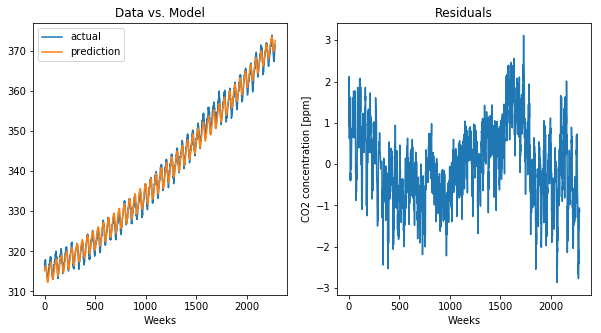

In [64]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y)
yhat = model.predict(X)
model_resid = y - yhat

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(weeks, y, label='actual')
axes[0].plot(weeks, yhat, label='prediction')
axes[1].plot(weeks, model_resid)
axes[0].set_title('Data vs. Model')
axes[0].set_xlabel('Weeks')
axes[1].set_ylabel('CO2 concentration [ppm]')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Weeks')

axes[0].legend()

for i, coef in enumerate(model.coef_):
    if abs(coef) > 0:
        print(coef, names[i])

While there are some patterns in the residuals the oscillations are significantly less significant. Let's check to see if it is stationary:

In [65]:
p_val = adfuller(model_resid)[1]
print("Probability the data is stationary: {}".format(1-p_val))

Probability the data is stationary: 0.9995500823802417


The probability that the data is stationary is now close to 1. We can check the autocorrelation and partial autocorrelation as well:

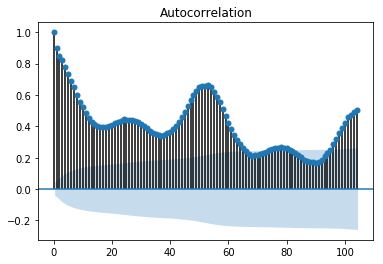

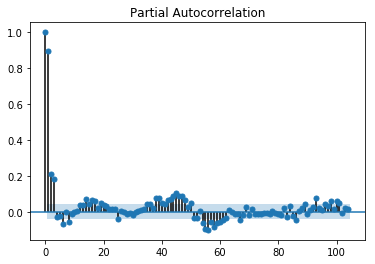

In [69]:
_ = plot_acf(model_resid, lags=104)
_ = plot_pacf(model_resid, lags=104)

There is still a significant amount of autocorrelation. We can apply differencing in addition to model fitting to remove these correlations:

Probability the data is stationary: 1.0


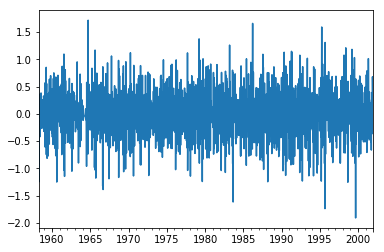

In [70]:
model_resid_diff = model_resid - model_resid.shift(1)
model_resid_diff = model_resid_diff[1:] #remove NaN from 0th position

p_val = adfuller(model_resid_diff)[1]
print("Probability the data is stationary: {}".format(1-p_val))

model_resid_diff.plot()

The data is now definitely stationary. We can also check the autocorrelations:

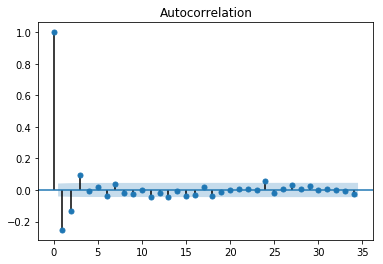

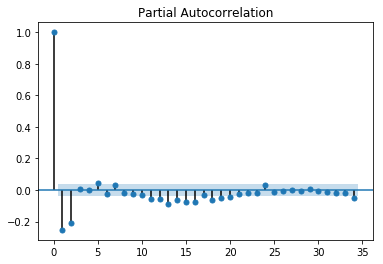

In [71]:
_ = plot_acf(model_resid_diff)
_ = plot_pacf(model_resid_diff)

The differences of residuals are now stationary and the autocorrelation and partial autocorrelation decay rapidly. However, we have done a lot of post-processing to get here.

## ARIMA Modeling

Now that we have done some pre-processing it is time to start building some models. First, let's create our train/test split. In this case we will use a very simple holdout approach, and just take a ratio of the data for training/testing. Unlike before, it is key that we *do not* randomize. We want to be sure that only the "past" data is used for training, and the order of the data points is now important.

In [72]:
train_ratio = 0.75
N_train = int(train_ratio*len(weeks))
N_test = len(weeks) - N_train
past_weeks = weeks[:N_train]
past_co2 = y[:N_train]

future_weeks = weeks[-N_test:]
future_co2 = y[-N_test:]

Note that it is also possible to use more advanced cross-validation with time series using the [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) function of `scikit-learn`. However, this is somewhat complicated so we won't cover it here.

Next, let's do a sanity check to be sure that we can reconstruct our actual data from our residual differences. First, we can predict the past trend using the LASSO model:

In [73]:
X_past, names = make_sine_features(past_weeks, sine_frequencies, sine_offsets)
past_trend = model.predict(X_past)

Next comes the tricky part. We need to reconstruct the residuals from the residual differences. We will do this for all of the residuals, then select the training data. We will also plot this and check the differences.

In [74]:
reconstruct_resid = np.zeros(len(model_resid))
reconstruct_resid[0] = model_resid[0]

for i in range(1,model_resid_diff.shape[0]):
    reconstruct_resid[i] = reconstruct_resid[i-1] + model_resid_diff[i-1]
    
past_resid_reconstruct = reconstruct_resid[:N_train]

Finally, we can add the reconstructed residuals to the trend to check that everything worked:

Max difference between reconstructed and actual past: 0.0


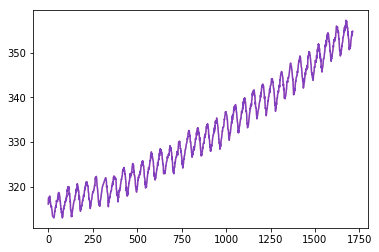

In [75]:
reconstructed_past = np.array(past_trend + past_resid_reconstruct)

print("Max difference between reconstructed and actual past: {}".format(abs(reconstructed_past - past_co2).max()))

fig, ax = plt.subplots()
ax.plot(past_weeks, reconstructed_past, '-r', alpha=0.5)
ax.plot(past_weeks, past_co2, '-b', alpha=0.5)

Next let's use our trend prediction to predict the trend in the future. Note that we have to add the past residual from the last point to make everything line up:

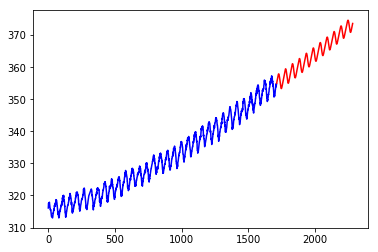

In [76]:
X_future, names = make_sine_features(future_weeks, sine_frequencies, sine_offsets)
y_future = model.predict(X_future) + past_resid_reconstruct[-1]


fig, ax = plt.subplots()
ax.plot(past_weeks, past_co2, '-b')
ax.plot(future_weeks, y_future, '-r')

### Auto-regressive Models

Finally we can build some models! The first type of model is based on the idea of auto-correlations, and is called an auto-regression model. The model follows the form:

$x_t = b + \sum_{i=1}^{p} w_i x_{t-i} + \epsilon_t$

where $b$ is a constant term, $w_i$ are weights, $x_t$ is the observation at time $t$, and $\epsilon_t$ is the error/residual. Note the similarity to the general linear models from prior modules:

$y_i = \sum_j w_j X_{ij} + \epsilon_i$

In this case, we have added an explicit intercept term, $b$, which was typically handled by adding a constant to the feature matrix $X_{ij}$ which is a small modification. The more significant difference is the fact that the feature matrix includes the data. We could write $x_{t-i}$ as a new feature matrix $X_{it}$ where $X_{it} = x_{t-i}$. This is a different approach to feature engineering that we have not seen before. Let's try to build the model:

In [81]:
p = 10

x = model_resid_diff

AR_X = []
AR_y = []
for i in range(N_train):
    if i >= p:
        AR_X.append(x[i-p:i])
        AR_y.append(x[i])

AR_X = np.array(AR_X)
AR_y = np.array(AR_y)

print(AR_X.shape)
print(AR_y.shape)

(1703, 10)
(1703,)


Next we just build a linear regression model:

In [82]:
from sklearn.linear_model import LinearRegression

ARM = LinearRegression()
ARM.fit(AR_X, AR_y)
ARM.score(AR_X, AR_y)

0.1268435747254698

The $r^2$ is quite low, but this shouldn't be surprising given how much the data looked like random noise. We can also use a traditional test/train split on the data since we have already accounted for the time dependence when we created the features, and we are still only working on the training data.

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_y, test_size=0.3)

ARM = LinearRegression()
ARM.fit(X_train, y_train)
ARM.score(X_test, y_test)

0.08181902167968724

We can use cross-validation to find the proper value of $p$, or we can use the Bayesian information criteria:

In [88]:
def BIC(y, yhat, k):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + k*np.log(n)
    return B

Text(0,0.5,'BIC')

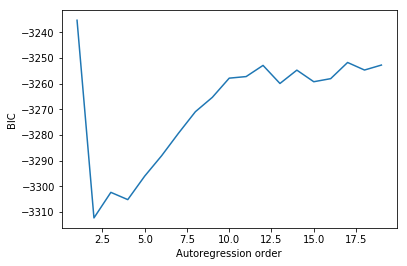

In [89]:
p_range = range(1,20)
BIC_list = []

for p in p_range:

    AR_X = []
    AR_y = []
    for i in range(N_train):
        if i >= p:
            AR_X.append(x[i-p:i])
            AR_y.append(x[i])
    ARM = LinearRegression()
    ARM.fit(AR_X, AR_y)
    yhat = ARM.predict(AR_X)
    BIC_p = BIC(AR_y, yhat, p)
    BIC_list.append(BIC_p)
    
fig, ax = plt.subplots()
ax.plot(p_range, BIC_list)
ax.set_xlabel('Autoregression order')
ax.set_ylabel('BIC')

Typically this can also be inferred from the partial autocorrelation:

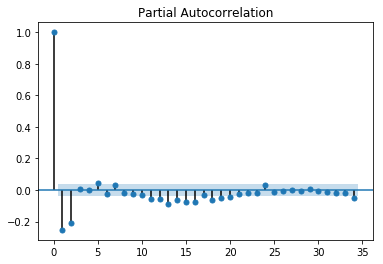

In [90]:
_ = plot_pacf(model_resid_diff)

The first two lags are highly significant for the partial auto-correlation, corresponding to the minimum in the BIC.

Now that we have established the order as 2 let's construct the model:

In [91]:
p = 2

AR_X = []
AR_y = []
for i in range(N_train):
    if i >= p:
        AR_X.append(x[i-p:i])
        AR_y.append(x[i])

ARM = LinearRegression()
ARM.fit(AR_X, AR_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can check our model by predicting the past. This turns out to be pretty tricky since we have to seed the residuals with the first $p$ actual residual differences. We also have to reconstruct the residuals from the predicted residual differences:

(1713,)


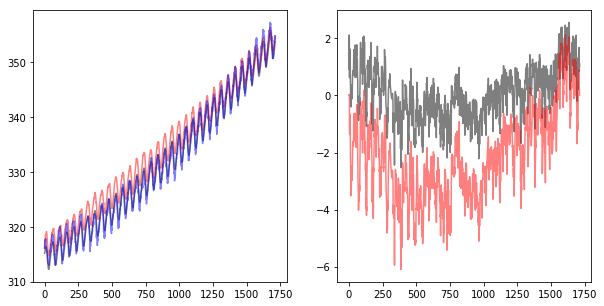

In [92]:
resid_diff_predict = ARM.predict(AR_X)

resid_diff_predict = list(model_resid_diff[:p]) + list(resid_diff_predict)
resid_diff_predict = np.array(resid_diff_predict)
print(resid_diff_predict.shape)

reconstruct_predict_resid = np.zeros(N_train)
reconstruct_predict_resid[0] = model_resid[0] #we still need to know the actual residual at t=0

for i in range(1,N_train):
    reconstruct_predict_resid[i] = reconstruct_predict_resid[i-1] + resid_diff_predict[i-1]
    
past_predict = np.array(past_trend + reconstruct_predict_resid)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(past_weeks, past_trend, '-k', alpha=0.5)
axes[0].plot(past_weeks, past_predict, '-r', alpha=0.5)
axes[0].plot(past_weeks, past_co2, '-b', alpha=0.5)

axes[1].plot(past_weeks, past_co2-past_trend, '-k', alpha=0.5)
axes[1].plot(past_weeks, past_co2-past_predict, '-r', alpha=0.5)

We see that the final result actually worse than just the trend prediction.

Finally, we can see what happens if we try to predict the future. This is also tricky because we have to dynamically update the data as we predict it, since we are now assuming we do not have access to the past data.

In [93]:
x = list(y_train[-p:])

AR_X = []
AR_y = []
for i in range(N_test+p): #add p since we are padding with p initial values
    if i >= p:
        new_AR_X = np.array(x[i-p:i])
        AR_X.append(new_AR_X)
        new_AR_X = new_AR_X.reshape(1,-1)
        next_x = ARM.predict(new_AR_X)
        next_x = float(next_x) #convert to float since sklearn returns np array
        x.append(next_x) #x has to grow to generate more inputs!

AR_X = np.array(AR_X)

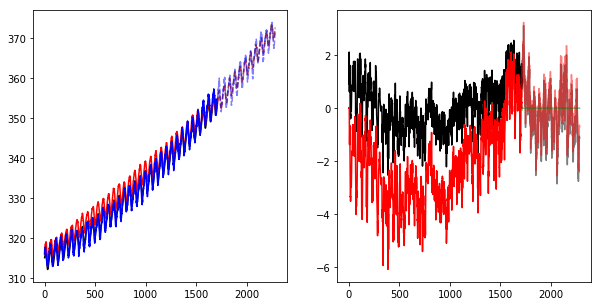

In [96]:
future_trend = model.predict(X_future)
resid_diff_predict = ARM.predict(AR_X)

reconstruct_predict_resid = np.zeros(N_test)
#reconstruct_predict_resid[0] = model_resid[N_train+1] #We can use the model residuals

reconstruct_predict_resid[0] = -(past_co2-past_predict)[-1] #Or we can use the predicted residual

for i in range(1,N_test):
    reconstruct_predict_resid[i] = reconstruct_predict_resid[i-1] + resid_diff_predict[i-1]
    
future_predict = np.array(future_trend + reconstruct_predict_resid)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(past_weeks, past_trend, '-k')
axes[0].plot(past_weeks, past_predict, '-r')
axes[0].plot(past_weeks, past_co2, '-b')

axes[0].plot(future_weeks, future_trend, '--k', alpha=0.5)
axes[0].plot(future_weeks, future_predict, '--r', alpha=0.5)
axes[0].plot(future_weeks, future_co2, '--b', alpha=0.5)


axes[1].plot(past_weeks, past_co2-past_trend, '-k')
axes[1].plot(past_weeks, past_co2-past_predict, '-r')

axes[1].plot(future_weeks, future_co2-future_trend, '-k', alpha=0.5)
axes[1].plot(future_weeks, future_co2-future_predict, '-r', alpha=0.5)
axes[1].plot(future_weeks, resid_diff_predict, '-g', alpha=0.5)

After all this work the result is that our model basically predicts zero all the time, and the result is essentially identical to the original trend we predicted. If data has been properly de-trended then it becomes very difficult to predict, since all that is left is noise. We can also see that this is a very tedious process.

### ARIMA Models

It is typical to combine the auto-regressive models with two additional terms:

* Integration: This is essentially the number of times a dataset needs to be differenced in order to by stationary.
* Moving Average: Moving average models are complementary to auto-regressive models.

Combining the 3 leads to an Auto-Regressive Integration Moving Average (ARIMA) model. Each of these model types have an associated order, typically denoted by $p$, $d$, and $q$ so that a model is specified as ARIMA(p,d,q).

#### Integration

The integration term is another confusingly-named term, but the order, $d$, can easily be determined by seeing how many times the data needs to be differenced before it is stationary.

#### Moving Average

A moving average model is poorly named because it has nothing to do with moving average smoothing introduced earlier. Instead, it is a linear model that uses prior residuals from other linear models as features:

$x_t = \mu + \sum_{i=1}^{q} w_i \epsilon_{t-i} + \epsilon_t $ 

where the meaning of all terms are equivalent to the autoregressive model, except $\epsilon_{t-i}$. This is defined as the error between a autoregression model of all prior terms:

$x_{t-i} = \sum_{j=1}^{N-t} \tilde{w}_j x_{t-1-j} + \epsilon_{t-i}$

This is even trickier to train, so we will rely on built-in implementations. When determining the parameter $q$ we can use the autocorrelation to determine the order, similar to how the partial autocorrelation was used for the autoregression term.

Let's go back to the original data and try to build and ARIMA model:

In [99]:
df_model = co2_df.copy()

del df_model['co2']
del df_model['co2_diff']

df_model.head(3)

,co2_interp
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6


Next we can make a train/test split:

In [100]:
train = df_model[:N_train]
test = df_model[N_train:N_train+N_test]

Now we can build an ARIMA model. We already know that the data becomes stationary after a single difference, which tells us $d=1$. We can also check the autocorrelation and partial autocorrelation to find $p$ and $q$:

Probability the data is stationary after 1 difference: 1.0


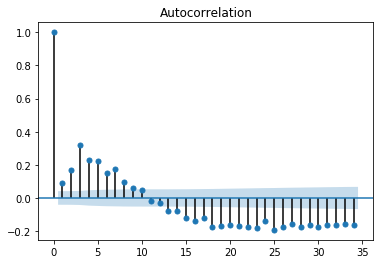

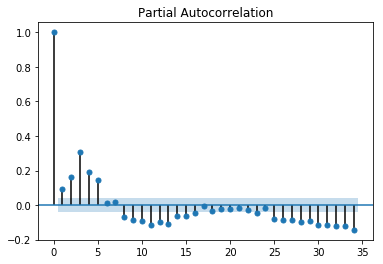

In [101]:
diffed = co2_df['co2_interp'] - co2_df['co2_interp'].shift(1)
diffed = diffed[1:]

p_val = adfuller(diffed)[1]
print("Probability the data is stationary after 1 difference: {}".format(1-p_val))

_ = plot_acf(diffed)
_ = plot_pacf(diffed)

The partial autocorrelation peaks at 3, and is significant to 5, so $p=3-5$ is a good choice. Based on the autocorrelation the autocorrelation peaks at 3, and seems significant to 8. This suggests that $q=3-8$ is a good option. We can check a few, and use the summary option to see the BIC:

In [106]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(4,1,4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.co2_interp   No. Observations:                 1712
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -851.597
Method:                       css-mle   S.D. of innovations              0.397
Date:                Mon, 13 Apr 2020   AIC                           1723.193
Time:                        19:40:06   BIC                           1777.647
Sample:                    04-05-1958   HQIC                          1743.345
                         - 01-19-1991                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0231      0.003      8.518      0.000       0.018       0.028
ar.L1.D.co2_interp     2.1958      0.099     22.189      0.000       2.002       2.390
ar.L2.D.co2_interp  

The summary contains lots of information about the model fit, information criteria, etc. We won't delve into the details, but for now we can just check the BIC to find a good model out of the possible options. Note that there are some issues with creating new ARIMA models inside of a `for` loop, so we can just check manually for now. It seems that 4,1,4 gives a relatively low BIC. Let's check the predictions:

0.3092426145369638


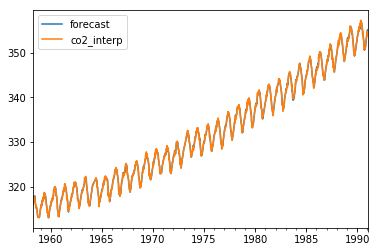

In [110]:
model_fit.plot_predict(dynamic=False)
print(np.mean(np.abs(model_fit.resid)))
plt.show()

These look excellent, and the mean absolute error is around 0.3 ppm. Next we can forecast into the future and compare it to the testing data:

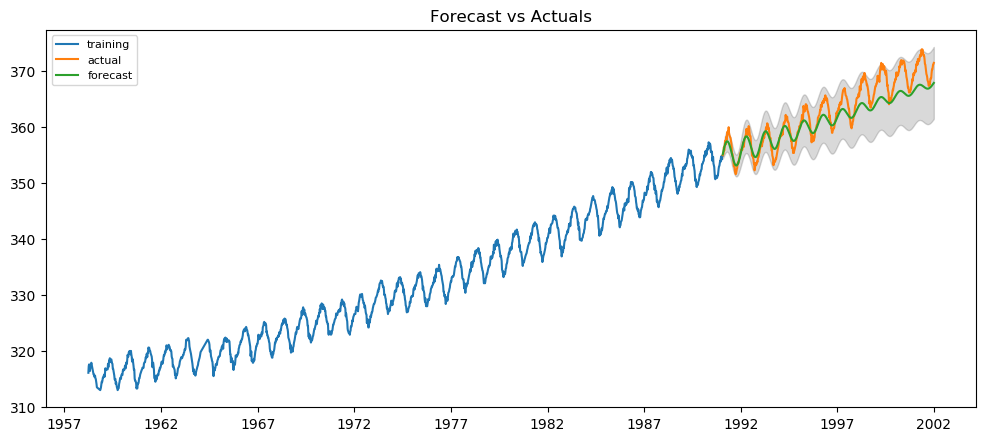

In [108]:
# Forecast
fc, se, conf = model_fit.forecast(N_test, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The actual predictions look reasonable at first, but the oscillating trend dies out over time. This is because we are now predicting *dynamically*, rather than using past data. The `statsmodels` package also makes it easy to predict error bars, which is critical for time series prediction since there is always considerable uncertainty in predicting the future. It is good to see that even as the predictions become inaccurate, the actual data lies within the 95% confidence bounds.

There is also an extension of ARIMA models called Seasonal ARIMA, or SARIMA, that accounts for seasonality. This introduces even more complexity and is beyond the scope of this course. However, it would likely perform even better for the CO$_2$ dataset since there are clear seasonal patterns.

## Conclusions

Time series analysis is difficult, but can yield powerful results if data at recent time points is expected to be available in a real application. There are often correlations between current and prior data in timeseries, so by leveraging prior data as features it may possible to obtain highly accurate predictions. These techniques represent a departure from the standard structure of machine learning models, and typically require more careful statistical analysis and validation procedures. In particular, the $r^2$ metric is typically very misleading for time series, and should only be applied to stationary datasets with low autocorrelation. Fortunately there are many packages available for performing time series analysis, including `statsmodels` and the more advanced `prophet` package released by Facebook. These implementations make it relatively easy to explore powerful models and make predictions, including uncertainty, about data in the future. However, remember that any prediction of the future is extrapolation, so proceed with caution.

## Further Reading

This notebook was composed based on input from the following blog posts:

* https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
* https://machinelearningmastery.com/time-series-trends-in-python/